# Importing the Libraries

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Reading the Image

In [2]:
image_path = '/content/q1.png'

# Finding the connected components

In [3]:
def find_connected_components(image_path):
    # Reading the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the image was read properly
    if image is None:
        raise ValueError("Image not found or unable to read image.")

    # Threshold the image to convert it to binary
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find connected components in the binary image
    num_labels, labels_im = cv2.connectedComponents(binary_image)

    return num_labels, labels_im

In [4]:
def label_components(labels_im):
    # Map component labels to hue values for visualization
    label_hue = np.uint8(179 * labels_im / np.max(labels_im))

    # Create an empty image with all channels set to 255 (white)
    blank_ch = 255 * np.ones_like(label_hue)

    # Merge the hue channel with the blank channels to create an HSV image
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Convert the HSV image to BGR format for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # Set the background label (0) to black
    labeled_img[label_hue == 0] = 0

    return labeled_img

In [5]:
# Finding connected components
num_labels, labels_im = find_connected_components(image_path)

# Label components with different colors
labeled_img = label_components(labels_im)

# Plotting the result

The original image:


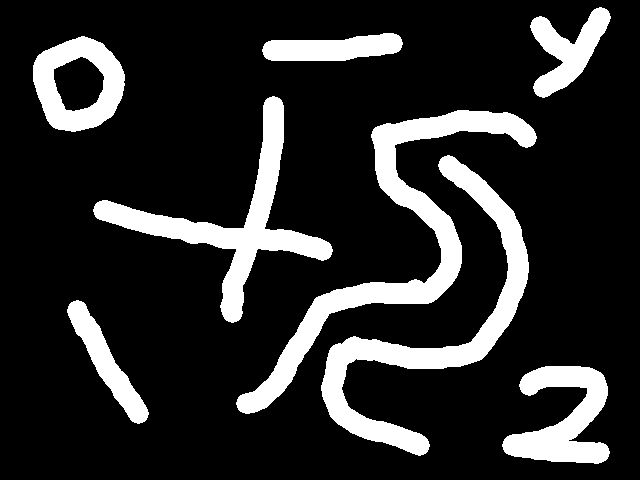

The labeled image:


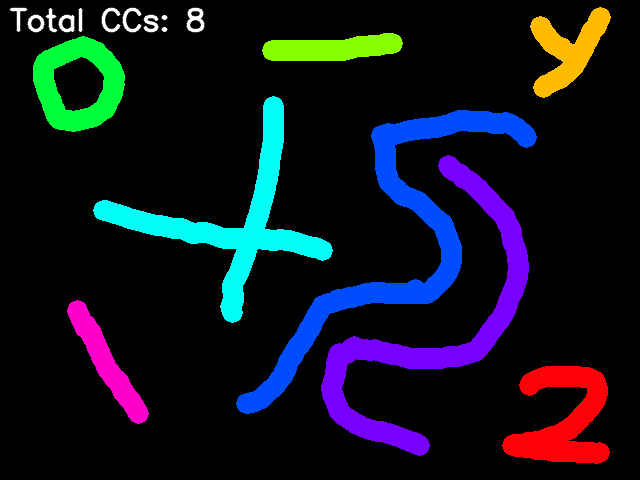

In [6]:
# Adding the number of connected components to the image
cv2.putText(labeled_img, f'Total CCs: {num_labels - 1}', (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Illustrating the original and labeled images
print("The original image:")
cv2_imshow(cv2.imread(image_path))
print("The labeled image:")
cv2_imshow(labeled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()